In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
matriz_linea = np.zeros((N,N))
linea = [] 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

def drawPoint(x, y):
  print(f'({x}, {y})')
  plt.scatter(x, y)

In [3]:
def imprimir_linea():
  for c in linea:
    matriz_linea[c[0],c[1]] = 1
    
  plt.imshow(matriz_linea)
  plt.colorbar()
  plt.show()

In [4]:
def line_bresenham(p1, p2):
  puntos = []
  x0, y0 = p1
  x1, y1 = p2
  dif_x, dif_y = x1 - x0, y1 - y0 
  dx, dy = abs(dif_x), abs(dif_y)
  if dy >= dx:
    dx, dy = dy, dx
  inc_E = 2 * dy # 2dy
  inc_NE = inc_E - 2 * dx # 2dy - 2dx
  d = inc_E - dx # 2dy - dx
  x, y = x0, y0
  #print(x, y)
  #drawPoint(x, y)
  puntos.append((x, y))
  #linea.append([y, x])
  x_inc = 1 if dif_x > 0 else - 1
  y_inc = 1 if dif_y > 0 else - 1
  x_inc = x_inc if dif_x != 0 else 0
  y_inc = y_inc if dif_y != 0 else 0
  flag = (abs(dif_y/dif_x) if dif_x != 0 else 0 ) > 1
  for _ in range(dx):
    x = x + x_inc if not flag else x 
    y = y + y_inc if flag else y
    if (d < 0 and flag) or (d < 0 and x_inc != 0 and not flag):
      d = d + inc_E
    else: 
      x = x + x_inc if flag else x
      y = y + y_inc if not flag else y
      d = d + inc_NE
    puntos.append((x, y))
    #print(x, y)
    #drawPoint(x, y)
    #linea.append([y, x])
  return puntos

In [5]:
def bresenham(p1, p2):
    x0, y0 = p1
    x1, y1 = p2
    dx, dy = x1 - x0, y1 - y0
    xsign = 1 if dx > 0 else -1
    ysign = 1 if dy > 0 else -1
    dx, dy = abs(dx), abs(dy)
    if dx > dy:
        xx, xy, yx, yy = xsign, 0, 0, ysign
    else:
        dx, dy = dy, dx
        xx, xy, yx, yy = 0, ysign, xsign, 0
    D = 2*dy - dx
    y = 0
    for x in range(dx + 1):
        yield x0 + x*xx + y*yx, y0 + x*xy + y*yy
        if D >= 0:
            y += 1
            D -= 2*dx
        D += 2*dy
#print(list(bresenham((2,3), (3,1))))

1 1 1 1
___________
(1, 1)
(-2, -1)
1 1 2 3
___________
(1, 1)
(-2, -1)
(2, 2)
(-1, 0)
(2, 3)
(-1, 1)
1 1 3 1
___________
(1, 1)
(-2, -1)
(2, 1)
(-1, -1)
(3, 1)
(0, -1)
2 3 2 3
___________
(2, 3)
(-1, 1)
2 3 3 1
___________
(2, 3)
(-1, 1)
(3, 2)
(0, 0)
(3, 1)
(0, -1)
3 1 3 1
___________
(3, 1)
(0, -1)


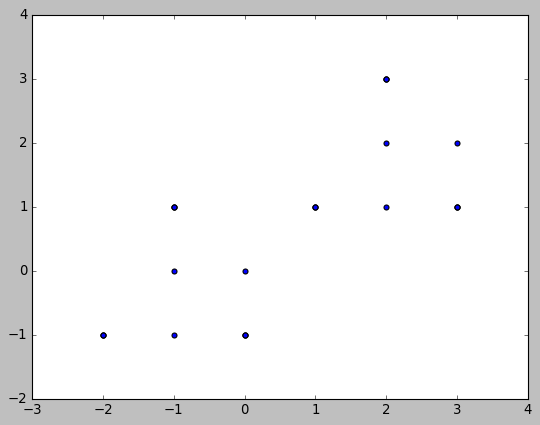

In [10]:
def traslacion(p = (0, 0), t = (0, 0)):
    x, y = p
    xt, yt = t
    return x + xt, y + yt

def Traslacion(puntos = [], T = (0, 0)):
    r = len(puntos)
    xt, yt = T
    for i in range(r):
        for j in range(i, r):
            x0, y0 = puntos[i] 
            x1, y1 = puntos[j]
            print(x0, y0, x1, y1)
            print('___________')
            #print(x0 + xt, y0 + yt, x1 + xt, y1 + yt)
            for k in  line_bresenham((x0, y0), (x1, y1)):
                x, y = k
                drawPoint(x, y)
                xtr, ytr = traslacion(k, T)
                drawPoint(xtr, ytr)
            #for k in list(bresenham((x0, y0), (x1, y1))):
            #    x, y = k
            #    drawPoint(x, y)
            
p1 = (1, 1) 
p2 = (2, 3)
p3 = (3, 1)
T = (-3, -2)
Traslacion([p1, p2, p3], T)